# Canada Open Data #

## Набор данных ##

url: http://www.data.gc.ca/

Набор данных: [Annual Projections of New Immigrants Seeking Jobs by Occupation](http://www.edsc-esdc.gc.ca/ouvert-open/labour-travail/immigration_2015_2024.csv) 
(Ежегодные прогнозы новых иммигрантов, ищущих работу по профессии)

Данные уже загружены и находятся в ./data/immigration_2015_2024.csv

Загрузим данные и посмотрим некоторые из них. Данные в кодировке cp1250.

## Структура данных ##

* Code - COPS код группы профессий
* Occupation_Name - английское название
* Nom_de_la_profession - французское название
* 2014-2024 - прогноз по годам

## "Познакомимся" с данными ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/immigration_2015_2024.csv', index_col=1, encoding='cp1250')
del data['Code']
del data['Nom_de_la_profession']

Посмотрим первые записи

In [3]:
data.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Occupation_Name,,,,,,,,,,,
All Occupations,120400,116600,118200,119700,121300,122900,124500,126000,127600,128900,130300
Management Occupations,9200,8900,8900,9000,9000,9100,9100,9200,9300,9300,9400
Occupations usually require university education.,24100,23300,23500,23800,24100,24400,24700,25000,25300,25500,25800
Occupations usually require college or vocational education or apprenticeship training.,32800,31900,32500,33000,33600,34100,34700,35200,35700,36200,36700
Occupations usually require secondary school and/or occupation-specific training.,35800,34500,34900,35300,35700,36100,36500,36900,37300,37600,37900


Посмотрим последнии записи

In [4]:
data.tail()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Occupation_Name,,,,,,,,,,,
Labourers in mineral and metal processing & Labourers in metal fabrication,100,100,100,100,100,100,100,100,100,100,100
Labourers in chemical products processing and utilities & Labourers in rubber and plastic products manufacturing,200,100,100,100,100,100,100,100,100,100,100
"Labourers in wood, pulp and paper processing",0,0,0,0,0,0,0,0,0,0,0
"Labourers in textile processing & Other labourers in processing, manufacturing and utilities",1100,1100,1000,1000,1000,1000,1000,1000,1000,1000,1000
"Labourers in food, beverage and related products processing & Labourers in fish and seafood processing",1100,1000,1000,1000,1000,1000,1000,1000,1000,1000,900


Размерность данных

In [5]:
data.shape

(308, 11)

## Проверим есть ли отсутствующие значения в данных ##

Проверим на NaN

In [6]:
data.isnull().any()

2014    False
2015    False
2016    False
2017    False
2018    False
2019    False
2020    False
2021    False
2022    False
2023    False
2024    False
dtype: bool

Проверим есть ли строки, содержащие только нули

In [7]:
zero_rows = data[(data == 0).all(axis=1)]
zero_rows.shape[0]

20

20 пустых строк, удалим их из набора данных

In [8]:
data = data[(data != 0).any(axis=1)]

Посмотрим как в целом по всем профессиям меняется количество иммигрантов ищущих работу.

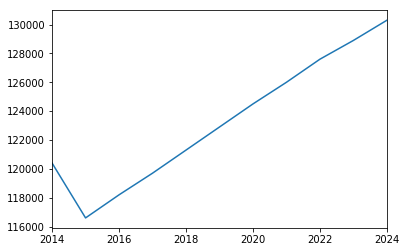

In [9]:
data.iloc[0].plot()

In [10]:
data.iloc[1:].describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,1262.717770,1223.344948,1237.979094,1254.006969,1269.686411,1291.289199,1306.620209,1319.512195,1336.585366,1351.567944,1361.672474
std,4391.564976,4259.203769,4320.853657,4382.511690,4446.152683,4510.410732,4573.394258,4636.949025,4696.593712,4752.193750,4804.855643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
50%,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
75%,550.000000,500.000000,500.000000,500.000000,500.000000,550.000000,550.000000,550.000000,550.000000,550.000000,600.000000
max,37100.000000,36200.000000,36900.000000,37500.000000,38200.000000,38900.000000,39500.000000,40200.000000,40800.000000,41400.000000,41900.000000


In [11]:
data.T.describe()

Occupation_Name,All Occupations,Management Occupations,Occupations usually require university education.,Occupations usually require college or vocational education or apprenticeship training.,Occupations usually require secondary school and/or occupation-specific training.,On-the-job training is usually provided for occupations.,Legislators and senior management,"Business, finance and administration occupations",Natural and applied sciences and related occupations,Health occupations,...,Printing equipment operators and related occupations,"Aircraft assemblers and aircraft assembly inspectors; Motor vehicle assemblers, inspectors and testers & Mechanical assemblers and inspectors","Electronics assemblers, fabricators, inspectors and testers","Assemblers and inspectors, electrical appliance, apparatus and equipment manufacturing & Assemblers, fabricators and inspectors, industrial electrical motors and transformers","Boat assemblers and inspectors; Plastic products assemblers, finishers and inspectors; Industrial painters, coaters and metal finishing process operators& Other products assemblers, finishers and inspectors",Furniture and fixture assemblers and inspectors; Other wood products assemblers and inspectors & Furniture finishers and refinishers,Labourers in mineral and metal processing & Labourers in metal fabrication,Labourers in chemical products processing and utilities & Labourers in rubber and plastic products manufacturing,"Labourers in textile processing & Other labourers in processing, manufacturing and utilities","Labourers in food, beverage and related products processing & Labourers in fish and seafood processing"
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.0,11.000000,11.000000,11.00000
mean,123309.090909,9127.272727,24500.000000,34218.181818,36227.272727,19236.363636,500.0,18736.363636,13681.818182,9545.454545,...,190.909091,454.545455,263.636364,172.727273,427.272727,400.00000,100.0,109.090909,1018.181818,1000.00000
std,4516.736553,167.874412,829.457654,1603.008535,1115.428984,832.193159,100.0,724.255103,256.195948,704.788814,...,30.151134,52.223297,50.452498,46.709937,46.709937,44.72136,0.0,30.151134,40.451992,44.72136
min,116600.000000,8900.000000,23300.000000,31900.000000,34500.000000,18000.000000,400.0,17700.000000,13300.000000,8600.000000,...,100.000000,400.000000,200.000000,100.000000,400.000000,300.00000,100.0,100.000000,1000.000000,900.00000
25%,120050.000000,9000.000000,23950.000000,32900.000000,35500.000000,18600.000000,400.0,18200.000000,13450.000000,8950.000000,...,200.000000,400.000000,200.000000,150.000000,400.000000,400.00000,100.0,100.000000,1000.000000,1000.00000
50%,122900.000000,9100.000000,24400.000000,34100.000000,36100.000000,19200.000000,500.0,18700.000000,13700.000000,9500.000000,...,200.000000,500.000000,300.000000,200.000000,400.000000,400.00000,100.0,100.000000,1000.000000,1000.00000
75%,126800.000000,9250.000000,25150.000000,35450.000000,37100.000000,19850.000000,550.0,19300.000000,13900.000000,10100.000000,...,200.000000,500.000000,300.000000,200.000000,450.000000,400.00000,100.0,100.000000,1000.000000,1000.00000
max,130300.000000,9400.000000,25800.000000,36700.000000,37900.000000,20500.000000,700.0,19900.000000,14000.000000,10600.000000,...,200.000000,500.000000,300.000000,200.000000,500.000000,500.00000,100.0,200.000000,1100.000000,1100.00000


Найдем группу профессий с мин/макс количеством иммигрантов за текущий 2017 год

In [12]:
year = '2017'

In [13]:
ix_min = data[year].iloc[1:].idxmin()
ix_min

u'Managers in public protection services'

In [14]:
data[year][ix_min]

0

Не удивительно, что ноль. К группе "Managers in public protection services" относятся такие подгруппы профессий как:
    
    * Commissioned police officers
    * Fire chiefs and senior firefighting officers
    * Commissioned officers of the Canadian Forces
    
Т.е. то, что связано с безопасностью. Иммигрантов, как правило не берут на такие профессии. Давайте, посмотрим,
а вообще по всем годам есть положительные прогнозы для данной группы?

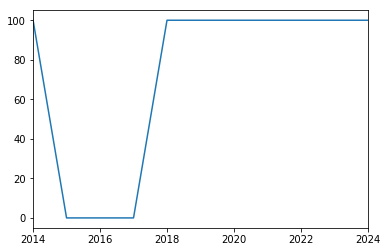

In [15]:
data.loc[ix_min].plot()

В 2014 году были и по прогнозам в будущем будут.

In [16]:
ix_max = data['2017'].iloc[1:].idxmax()
ix_max

u'Sales and service occupations'

In [17]:
data[year][ix_max]

37500

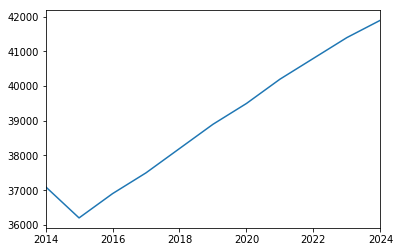

In [18]:
data.loc[ix_max].plot()

Найдем топ-5 за текущий год.

In [19]:
data.iloc[1:].sort_values(by=[year], ascending=False)[year].head()

Occupation_Name
Sales and service occupations                                                              37500
Occupations usually require secondary school and/or occupation-specific training.          35300
Occupations usually require college or vocational education or apprenticeship training.    33000
Occupations usually require university education.                                          23800
On-the-job training is usually provided for occupations.                                   18600
Name: 2017, dtype: int64

Попробуем найти все группы профессий, связанных с информационными технологиями.

In [20]:
ixs_comp = ['computer' in el.lower() for el in data.index]
data = data[ixs_comp]

In [21]:
data

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Occupation_Name,,,,,,,,,,,
Computer and information systems managers,500,500,500,500,500,500,500,500,500,500,600
Computer engineers (except software engineers and designers),500,500,500,500,500,500,500,500,500,500,500
Computer programmers and interactive media developers,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
Computer network technician,700,600,600,600,600,700,700,700,700,700,700


Какие-то "скучные" прогнозы.

## Ответы на замечания ##

In [22]:
data = pd.read_csv('./data/immigration_2015_2024.csv', index_col=1, encoding='cp1250')
del data['Code']
del data['Nom_de_la_profession']
zero_rows = data[(data == 0).all(axis=1)]
data = data[(data != 0).any(axis=1)]

### 0. каких профессий ожидается больше всего в каждый из годов ###

In [23]:
data.iloc[1:].idxmax()

2014    Sales and service occupations
2015    Sales and service occupations
2016    Sales and service occupations
2017    Sales and service occupations
2018    Sales and service occupations
2019    Sales and service occupations
2020    Sales and service occupations
2021    Sales and service occupations
2022    Sales and service occupations
2023    Sales and service occupations
2024    Sales and service occupations
dtype: object

In [24]:
data.loc['Sales and service occupations']

2014    37100
2015    36200
2016    36900
2017    37500
2018    38200
2019    38900
2020    39500
2021    40200
2022    40800
2023    41400
2024    41900
Name: Sales and service occupations, dtype: int64

По всем года лидирует группа продажи и сервис, что собственно не удивительно.

### 1. у каких профессий наибольшее изменение в прогнозе наблюдается ###

Найдём процентное изменение по годам

In [25]:
pct_data = data.iloc[1:].pct_change(axis=1)
pct_data.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Occupation_Name,,,,,,,,,,,
Management Occupations,NaN,-0.032609,0.000000,0.011236,0.000000,0.011111,0.000000,0.010989,0.010870,0.000000,0.010753
Occupations usually require university education.,NaN,-0.033195,0.008584,0.012766,0.012605,0.012448,0.012295,0.012146,0.012000,0.007905,0.011765
Occupations usually require college or vocational education or apprenticeship training.,NaN,-0.027439,0.018809,0.015385,0.018182,0.014881,0.017595,0.014409,0.014205,0.014006,0.013812
Occupations usually require secondary school and/or occupation-specific training.,NaN,-0.036313,0.011594,0.011461,0.011331,0.011204,0.011080,0.010959,0.010840,0.008043,0.007979
On-the-job training is usually provided for occupations.,NaN,-0.032258,0.016667,0.016393,0.016129,0.015873,0.015625,0.010256,0.015228,0.015000,0.009852


Найдём инексы и максимальные значения по каждой группе профессий.
Затем объеденим их в один DataFrame.

In [26]:
s1 = pct_data.idxmax(axis=1)
s2 = pct_data.max(axis=1)
max_data = pd.concat([s1, s2], axis=1).sort_values(1, axis=0, ascending=False)
max_data.head()

,0,1
Occupation_Name,,
School principals and administrators of elementary and secondary education,2018,inf
"Crane operators, drillers and blasters",2020,inf
Managers in public protection services,2019,inf
Managers in natural resources production and fishing,2020,inf
"Agricultural service contractors, farm supervisors and specialized livestock workers & Contractors and supervisors, landscaping, grounds maintenance and horticulture services",2018,1.000000


У нас есть группы профессий со значением inf, т.е. спрос на эти профессии изменился с нуля до некоторого значения.

Посмотрим это на графике.

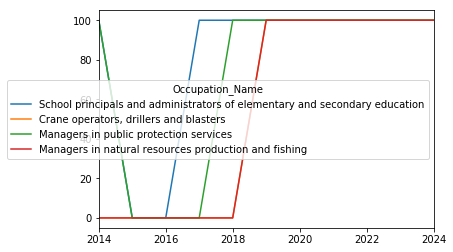

In [27]:
inf_idx = max_data.index[0:4]
data.loc[inf_idx].T.plot()

Найдем топ-5 групп профессий и год, в который был наибольший спрос.

In [28]:
max_data.iloc[4:].head(5)

,0,1
Occupation_Name,,
"Agricultural service contractors, farm supervisors and specialized livestock workers & Contractors and supervisors, landscaping, grounds maintenance and horticulture services",2018,1.0
Interior designers and interior decorators,2016,1.0
"Aerospace engineers & Other professional engineers, n.e.c.",2023,1.0
"Managers in art, culture, recreation and sport",2020,1.0
"Support occupations in accommodation, travel and amusement services",2021,1.0


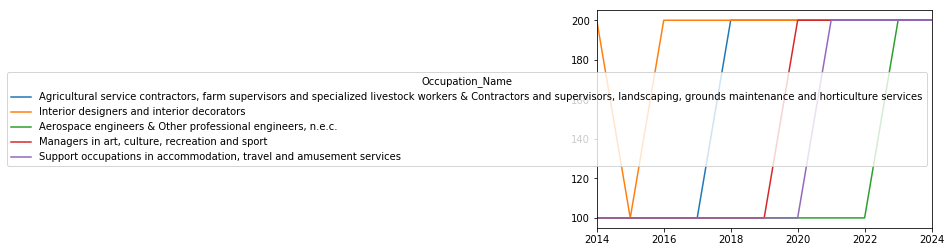

In [29]:
max_idx = max_data.iloc[4:].head(5).index
data.loc[max_idx].T.plot()

### 2. попробовать как-то по ключевым словам сгруппировать профессии и посмотреть, где больше вакансий. ###

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [167]:
jobs = data.index[1:]

In [168]:
vectorizer = TfidfVectorizer(stop_words=['occupations'])
tfidf = vectorizer.fit_transform(jobs.str.lower())

In [169]:
num_clusters = 20
km = KMeans(n_clusters=num_clusters, random_state=14)

In [170]:
km.fit(tfidf)
clusters = km.labels_.tolist()

In [171]:
sum_data = {'sum': data.iloc[1:].sum(axis=1), 'cluster': clusters}
jobs_clusters = pd.DataFrame(sum_data, index=[jobs])

In [172]:
grouped = jobs_clusters.groupby(jobs_clusters['cluster'])

In [173]:
grouped.get_group(8)

,cluster,sum
Occupation_Name,,
Administrative officers,8,14000
Executive assistants,8,2200
Administrative assistants,8,13600
Legal administrative assistants,8,2200
Dental assistants,8,3300
Early childhood educators and assistants,8,24700
Legal and public protection support occupations,8,1100


In [174]:
grouped.sum().sort_values('sum', ascending=False).head(3)

,sum
cluster,
13,1263700
14,816700
0,443500


In [176]:
grouped.get_group(13)

,sum
Occupation_Name,
Occupations usually require university education.,269500
Occupations usually require college or vocational education or apprenticeship training.,376400
Occupations usually require secondary school and/or occupation-specific training.,398500
On-the-job training is usually provided for occupations.,211600
Administrators - post-secondary education and vocational training,1100
College and other vocational instructors,6600


In [178]:
grouped.get_group(14)

,sum
Occupation_Name,
Natural and applied sciences and related occupations,150500
Sales and service occupations,428600
"Natural resources, agriculture and related production occupations",25300
"Banking, credit and other investment managers",4500
Restaurant and food service managers,11500
"Insurance adjusters and claims examiners; Insurance underwriters; Assessors, valuators and appraisers & Customs, ship and other brokers",3300
"Banking, insurance and other financial clerks & Collectors",3900
"Mail, postal and related workers",2200
Electronic service technician (household and business equipment),4400


In [179]:
grouped.get_group(0)

,sum
Occupation_Name,
Health occupations,105000
Retail and wholesale trade managers,24300
Human resources professionals,3300
"Supervisors, library, correspondence and related information workers; Supervisors, mail and message distribution occupations & Supervisors, supply chain, tracking and scheduling co-ordination occupations",3300
Property administrators,3300
Receptionists,7700
Letter carriers,1100
Physical science professionals,5500
Life science professionals,3300
